<a href="https://colab.research.google.com/github/Raidenkyu/hermit-study/blob/master/hermit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
projects_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/projects.csv?token=AGF4DR5S4K5DLXHXVEVQY3DA2DMKI', delimiter=";")
evaluations_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/evaluations.csv?token=AGF4DR2JZLZBJ2S2QYWYQDLA2DMJE', delimiter=";")

In [ ]:
projects_database

,name,count,url,status,build
0,ColorlibHQ/AdminLTE,1,https://github.com/ColorlibHQ/AdminLTE,discarded,NaN
1,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN
2,huggingface/transformers,7,https://github.com/huggingface/transformers,discarded,NaN
3,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN
4,nylas/nylas-mail,1,https://github.com/nylas/nylas-mail,discarded,NaN
...,...,...,...,...,...
115,facebookresearch/Detectron,1,https://github.com/facebookresearch/Detectron,NaN,NaN
116,streamaserver/streama,2,https://github.com/streamaserver/streama,NaN,NaN
117,horovod/horovod,5,https://github.com/horovod/horovod,NaN,NaN
118,numpy/numpy,2,https://github.com/numpy/numpy,NaN,NaN


In [ ]:
evaluations_database

,name,bloatRatio,missedDependencies,balance,ports,risk,entrypoint
0,athena,0.0,0.0,0,NaN,0,70.6
1,cowait,0.0,36.5,3771,NaN,0,100.0
2,vulcan,0.0,0.0,0,NaN,0,70.6
3,newTrackon,93.6,17.0,3635,100.0,0,100.0
4,sherlock,72.5,42.9,877454,NaN,0,100.0
5,k8s-sidecar,92.2,38.0,0,NaN,0,100.0
6,pipenv,21.5,84.7,56081719,NaN,0,100.0
7,RSSHub,27.1,1.1,18432,100.0,0,70.6
8,gitlab-semantic-versioning,4.0,47.4,8988389,NaN,0,100.0
9,findmeaflat,88.8,0.0,0,NaN,0,0.0


,count
status,
accepted,43
discarded,46


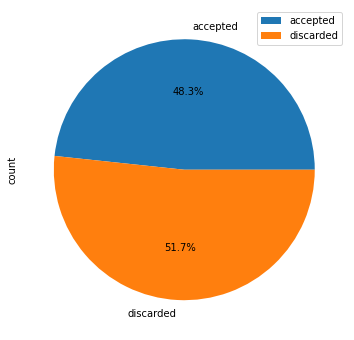

In [ ]:
status_count = projects_database.groupby('status').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'build'])

,count
build,
failed-build,10
require-extra-steps,1
successful,32


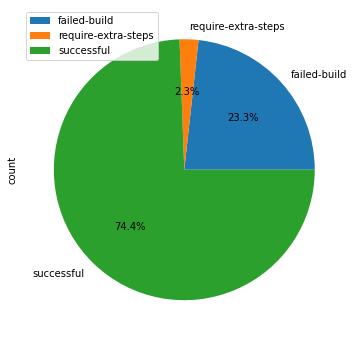

In [ ]:
status_count = projects_database.groupby('build').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'status'])

In [7]:
def calculate_statistics(column):
  min = column.quantile(0.0)
  q1 = column.quantile(0.25)
  q2 = column.quantile(0.50)
  q3 = column.quantile(0.75)
  max = column.quantile(1.0)
  
  iqr = q3 - q1
  lb = q1 - (1.5 * iqr)
  ub = q3 + (1.5 * iqr)

  mean = column.mean()
  std = column.std()

  return min, q1, q2, q3, max, iqr, lb, ub, mean, std

In [18]:
renamed_evaluations = evaluations_database.rename(columns={
    'bloatRatio': 'Bloat Ratio',
    'missedDependencies': 'Missed Dependencies Ratio',
    'balance':'Balance',
    'ports': 'Ports Detection Accuracy',
    'risk': 'Risk Percentage',
    'entrypoint': 'Entrypoint Similarity'
})

Mean Bloat Ratio: 37.57741935483871 %
Min: 0.0
LB: -110.47500000000001
Q1: 0.0
Q2: 27.1
Q3: 73.65
UB: 184.125
Max: 93.6
IQR: 73.65
Standard Deviation: 37.22716489946035


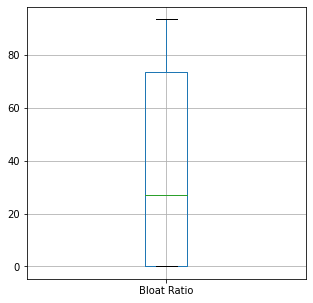

In [19]:
# Bloat Ratio

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['bloatRatio'])

print(f"Mean Bloat Ratio: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

renamed_evaluations.boxplot(column=['Bloat Ratio'], figsize=(5, 5))

Mean Missed Dependencies Ratio: 24.354838709677427 %
Min: 0.0
LB: -67.5
Q1: 0.0
Q2: 8.2
Q3: 45.0
UB: 112.5
Max: 84.7
IQR: 45.0
Standard Deviation: 29.5315745004075


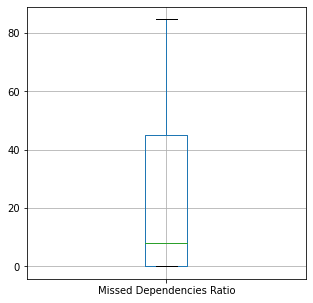

In [20]:
# Missed Dependencies Ratio

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['missedDependencies'])

print(f"Mean Missed Dependencies Ratio: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

renamed_evaluations.boxplot(column=['Missed Dependencies Ratio'], figsize=(5, 5))

Mean Balance: 5.905479064516129 MB
Min: -9.459986
LB: -1.237182
Q1: 0.0
Q2: 0.0
Q3: 0.824788
UB: 2.06197
Max: 56.081719
IQR: 0.824788
Standard Deviation: 15.135520760010225


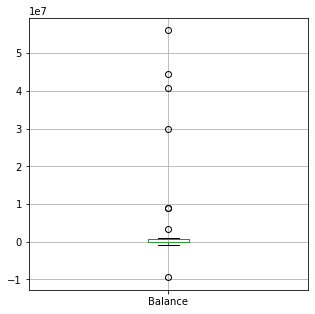

In [21]:
# Balance

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['balance'])

print(f"Mean Balance: {mean / 1000000} MB")
print(f"Min: {min / 1000000}")
print(f"LB: {lb / 1000000}")
print(f"Q1: {q1 / 1000000}")
print(f"Q2: {q2 / 1000000}")
print(f"Q3: {q3 / 1000000}")
print(f"UB: {ub / 1000000}")
print(f"Max: {max / 1000000}")
print(f"IQR: {iqr / 1000000}")
print(f"Standard Deviation: {std / 1000000}")

renamed_evaluations.boxplot(column=['Balance'], figsize=(5, 5))

Mean Ports Detection Accuracy: 100.0 %
Min: 100.0
LB: 100.0
Q1: 100.0
Q2: 100.0
Q3: 100.0
UB: 100.0
Max: 100.0
IQR: 0.0
Standard Deviation: 0.0


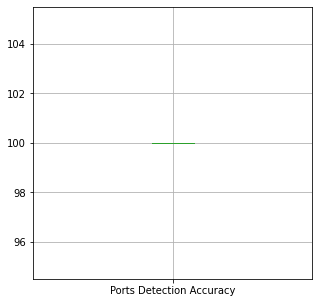

In [22]:
# Ports Detection Accuracy

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['ports'].dropna())

print(f"Mean Ports Detection Accuracy: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

renamed_evaluations.boxplot(column=['Ports Detection Accuracy'], figsize=(5, 5))

Mean Risk Percentage: 0.0 %
Min: 0.0
LB: 0.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
UB: 0.0
Max: 0.0
IQR: 0.0
Standard Deviation: 0.0


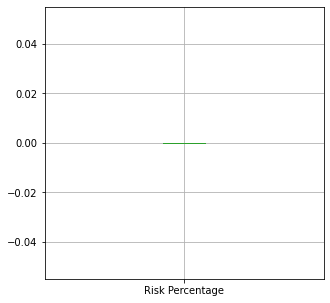

In [23]:
# Risk Percentage

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['risk'])

print(f"Mean Risk Percentage: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

renamed_evaluations.boxplot(column=['Risk Percentage'], figsize=(5, 5))

Mean Entrypoint Similarity: 80.11290322580643 %
Min: 0.0
LB: 26.499999999999986
Q1: 70.6
Q2: 100.0
Q3: 100.0
UB: 144.10000000000002
Max: 100.0
IQR: 29.400000000000006
Standard Deviation: 32.329591624758514


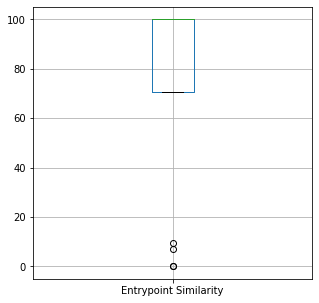

In [24]:
# Entrypoint Similarity

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['entrypoint'])

print(f"Mean Entrypoint Similarity: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

renamed_evaluations.boxplot(column=['Entrypoint Similarity'], figsize=(5, 5))